# **GeoDiscovery: Exploratory Analysis of Geolocational Data**
### Project by Gautam Rai, Mradul Gupta, Shiwangita Singh
---
## Introduction:
This project is focused on analyzing geolocational data to recommend accommodations to immigrants in a city, such as Bangalore. The goal is to use K-Means Clustering on datasets to classify accommodation for incoming students based on their preferences, including amenities, budget, and proximity to certain locations.

### Objectives:
- **Data Fetching & Cleaning**
- **Data Exploration & Visualization**
- **K-Means Clustering**
- **Geolocational Data Collection**
- **Final Presentation**

---
## Task 1: Data Preparation:
The first step is to fetch the datasets, clean them, and prepare them for further analysis. The dataset will be read using `pandas` and unnecessary columns will be removed. This process is crucial to ensure that the analysis is efficient and accurate.


In [27]:
# Importing important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import requests

In [28]:
# Loading the dataset
df=pd.read_csv("food_coded.csv")
df.shape

(125, 61)

In [29]:
# Quick overview of the dataset
df.head(63)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,3.5,1,1,610,3.0,420.0,2,"Chocolate, ice cream, pasta","Stress, boredom, sadness",1.0,...,1.0,1.0,5,1165.0,690,Skiing,5,1,1315,155
59,3.7,1,1,610,NaN,420.0,2,Mac n Cheese. Chips and salsa. Ice cream.,Boredom. Celebration.,2.0,...,2.0,1.0,5,1165.0,500,skiing,4,2,1315,155
60,3.6,1,1,610,4.0,420.0,2,"peanut butter, dessets, pretzels.","Sadness, boredom, lonely.",3.0,...,1.0,1.0,1,1165.0,690,Water polo and running,5,1,1315,135
61,Personal,1,1,610,2.0,980.0,2,"Macaroons, truffles, peanut butter n chocolate...","I do not really eat ""comfort food"" but I guess...",3.0,...,2.0,2.0,2,725.0,500,NaN,3,1,1315,118


In [5]:
df.tail(62)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,2.6,1,1,610,4.0,980.0,2,"carrots and ranch, pretzels, dark chocolate",sadness,3.0,...,NaN,1.0,4,1165.0,690,rowing,5,2,1315,180
64,3.5,1,1,610,3.0,420.0,1,"cookies, nutella, ice cream, coffee, fruit","Bordem, happiness, sadness",2.0,...,2.0,1.0,3,940.0,500,Volleyball,5,1,760,140
65,3.2,1,1,610,NaN,315.0,2,mac and cheese,boredom,2.0,...,1.0,2.0,4,725.0,500,NaN,3,2,900,112
66,3,1,1,720,3.0,420.0,1,"Chocolate, Popcorn, Icecream",sadness,3.0,...,1.0,1.0,3,940.0,500,tennis,5,1,900,125
67,3.6,1,1,610,2.0,420.0,1,"Ice cream, cake, mozzarella sticks, pierogies",Boredom,2.0,...,1.0,1.0,2,940.0,690,"Recreational Basketball, Equestrian Team",5,2,1315,144 lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


In [6]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

### Data Cleaning:
#### Dropping irrelevant columns, duplicated values and handling NaN values

In [8]:
columns_to_remove=['GPA', 'Gender','breakfast','calories_chicken','calories_day','calories_scone','coffee','comfort_food','comfort_food_reasons','comfort_food_reasons_coded','comfort_food_reasons_coded.1','cuisine','diet_current','diet_current_coded','drink','eating_changes','eating_changes_coded','eating_changes_coded1','father_education','father_profession','fav_cuisine','fav_cuisine_coded','fav_food','food_childhood','fries','grade_level','greek_food','healthy_feeling','healthy_meal','ideal_diet','ideal_diet_coded','indian_food','italian_food','life_rewarding','marital_status','meals_dinner_friend','mother_education','mother_profession','nutritional_check','parents_cook','persian_food','self_perception_weight','soup','thai_food','tortilla_calories','turkey_calories','type_sports','vitamins','waffle_calories','weight']
df=df.drop(columns=columns_to_remove)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           122 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     116 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       112 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         124 non-null    float64
 7   on_off_campus  124 non-null    float64
 8   pay_meal_out   125 non-null    int64  
 9   sports         123 non-null    float64
 10  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.9 KB


In [9]:
# Checking for NULL values
df.isnull().sum()

cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

In [30]:
# Handling Null values
df=df.fillna(0)
df.isnull().sum()

GPA                 0
Gender              0
breakfast           0
calories_chicken    0
calories_day        0
                   ..
type_sports         0
veggies_day         0
vitamins            0
waffle_calories     0
weight              0
Length: 61, dtype: int64

In [11]:
df.duplicated().sum()

0

The dataset is now ready for further analysis.

---

## Task 2: Data Exploration and Visualization:
### In this step, we will explore the dataset using descriptive statistics and visualize it using box plots to gain insights into the distribution of various parameters.

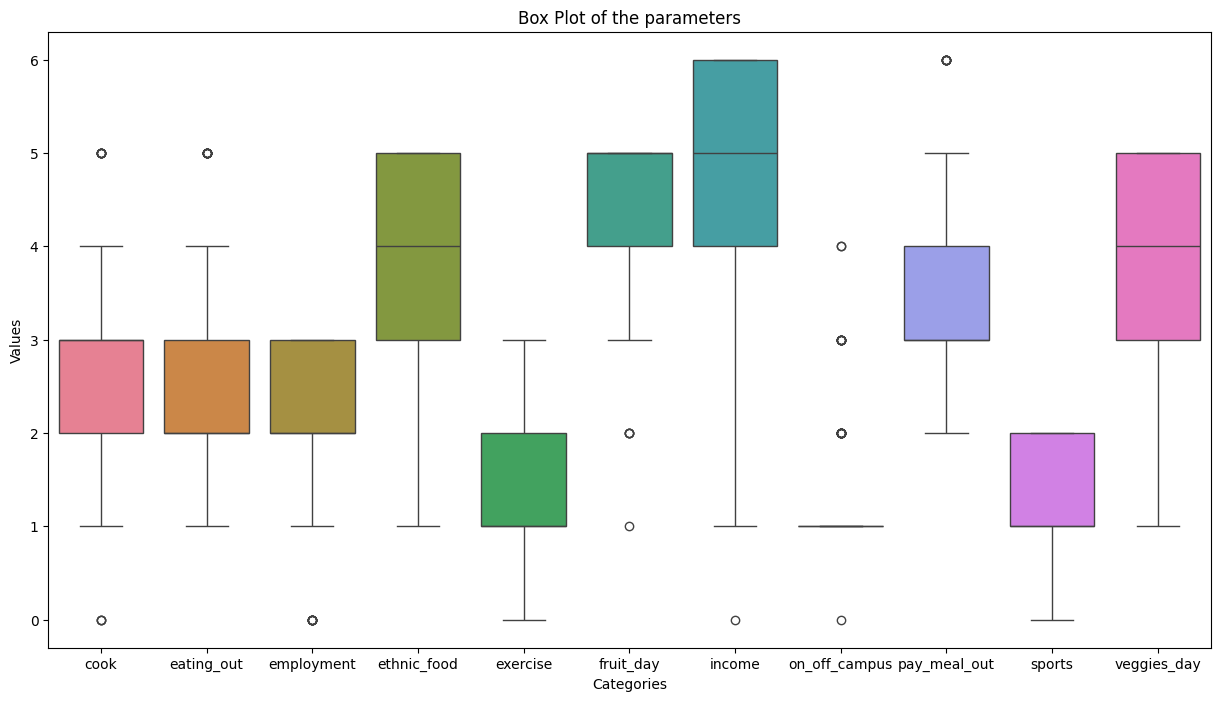

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title('Box Plot of the parameters')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

**Insights from Box Plot:**
- **Cook**: The majority of people cook 2- A couple of times a week or 3 - Whenever they can, but that is not very often  
- **Eating_out**: Majority of people eat out 2- 1 to 2 times or 3- 2 to 3 times 
- **Employment**: Most of the people are doing 2- part time job or 3- no job
- **Ethnic_food**: Among (1- very unlikely, 2- unlikely, 3- neutral, 4- likely, 5- very likely) most people choose 2,3,4.
- **Exercise**: Majority of people do exercise 1- Everyday 2- Twice or three times per week.
- **Fruit_day**: Most of the people 4- likely or 5- very likely to eat fruit in a regular day. 
- **Income**: Majority of people having income more than $50,000.
  
- **on_off_campus – living situation**: Almost everyone living in campus.
- **pay_meal_out - Amount they would pay for meal out**: Majority pays 10 to 30 dollars.
  
- **Sports**: It's equally likely to happen they do sport or not.
- **Veggies_day**: Majority lies in between [2- unlikely, 3- neutral, 4- likely].

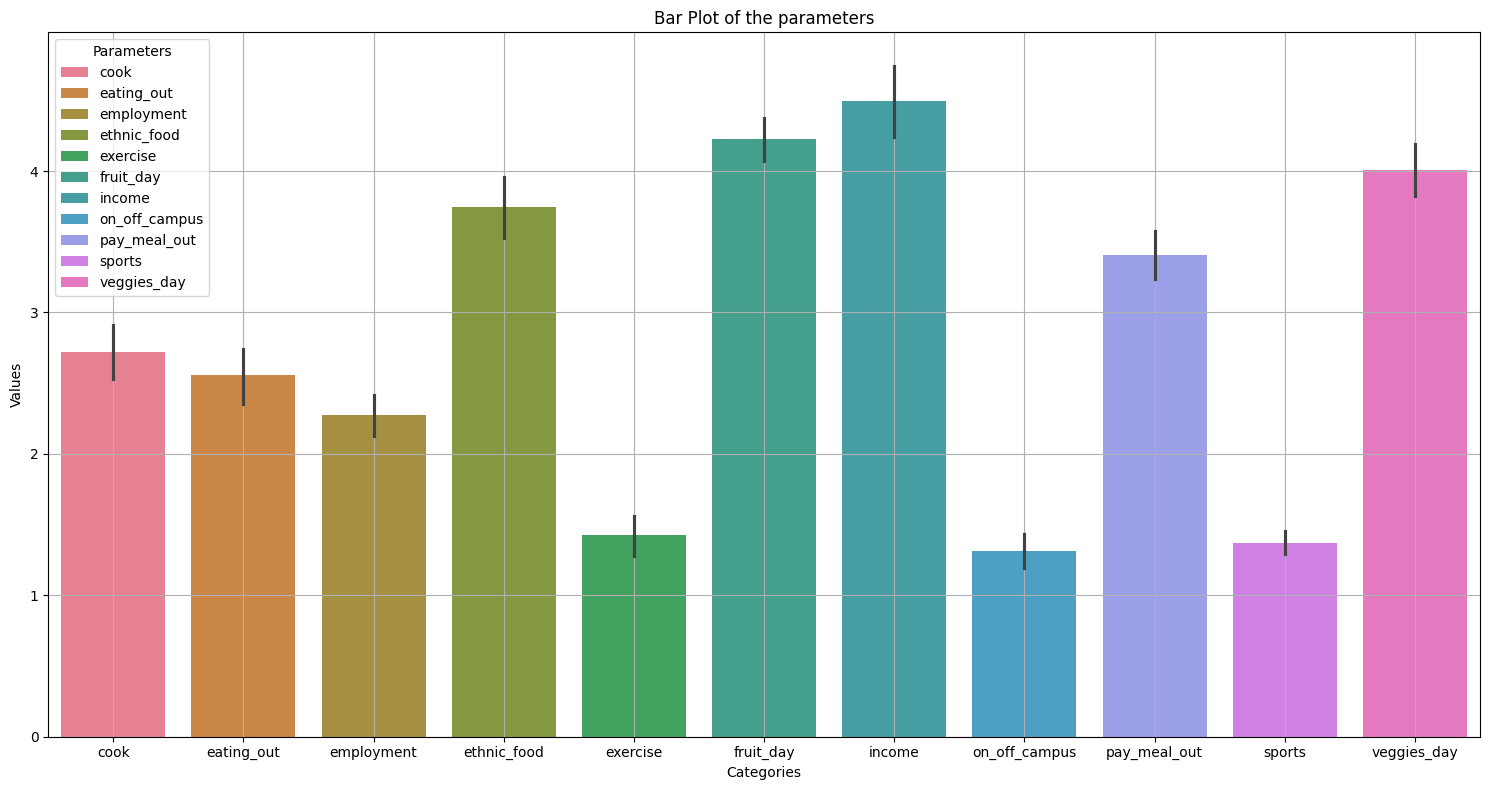

In [13]:
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=df, legend=True)
plt.title('Bar Plot of the parameters')
plt.xlabel('Categories')
plt.ylabel('Values')
ax.legend(title='Parameters')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
df.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


---
## Task 3: K-Means Clustering
 K-Means clustering is used to group locations based on various features such as income, exercise habits, and food preferences. The optimal number of clusters, `K`, will be determined through experimentation.
### Finding the optimal value of K through different methods:

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### Elbow Method:

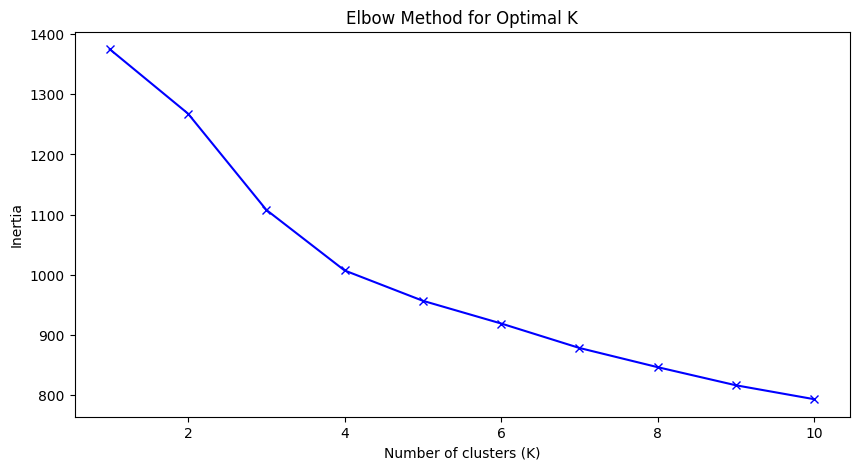

In [16]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

The **elbow method** is a graphical method for finding the optimal K value in a k-means clustering algorithm.<br>
The **optimal K value** is the point at which the graph forms an elbow.<br>
**Here Optimal K value is 3.**

### Silhouette Score:

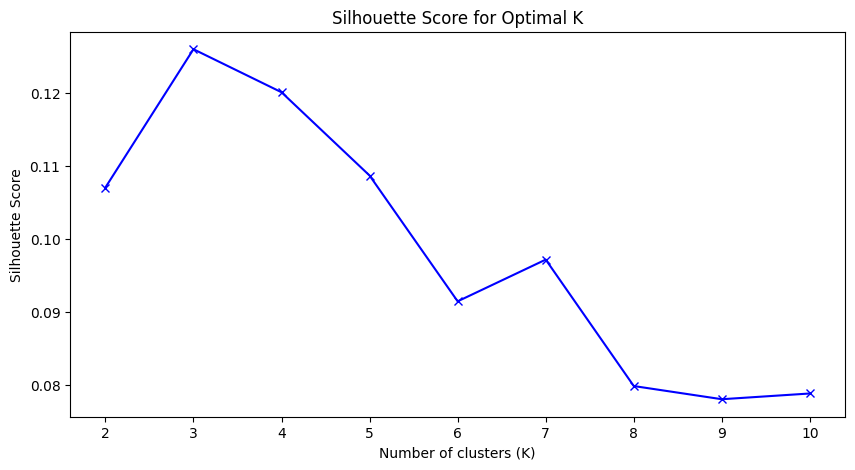

In [18]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [19]:
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters (K) is: {best_k}")

The optimal number of clusters (K) is: 3


**Here Optimal K value is 3.** <br>
In conclusion, The optimal K value from both the method **Elbow Method** and **Silhouette Score** is `3`. 

### Making the data fit for K mean clustering:

In [33]:
optimal_k = best_k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(scaled_data)

df['Cluster'] = final_kmeans.labels_
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Cluster
0,2.4,2,1,430,0.0,315.0,1,none,we dont have comfort,9.0,...,1.0,1,1165.0,345,car racing,5,1,1315,187,0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,2,725.0,690,Basketball,4,2,900,155,0
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.,1
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,2.0,5,725.0,690,0,3,1,1315,"Not sure, 240",2
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,4,940.0,500,Softball,4,2,760,190,0


In [34]:
df.tail()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Cluster
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,0.0,...,1.0,5,940.0,500,Softball,5,1,1315,156,1
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,0.0,...,0.0,4,940.0,500,basketball,5,2,1315,180,0
122,3.882,1,1,720,0.0,420.0,1,"rice, potato, seaweed soup",sadness,0.0,...,2.0,5,580.0,690,none,4,2,1315,120,0
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",0.0,...,2.0,1,940.0,500,0,3,1,1315,135,2
124,3.9,1,1,430,0.0,315.0,2,"Chocolates, pizza, and Ritz.","hormones, Premenstrual syndrome.",0.0,...,2.0,2,725.0,345,0,4,2,575,135,2


In [49]:
# Calculating the mode column-wise for each cluster
df = df.applymap(str)
cluster_mode = df.groupby('Cluster', group_keys=False).apply(lambda x: x.drop('Cluster', axis=1).mode().iloc[0])
print(cluster_mode.transpose())

Cluster              0     1     2
0                                 
GPA                3.5   3.5   3.4
Gender               1     1     1
breakfast            1     1     1
calories_chicken   610   610   610
calories_day       3.0   3.0   3.0
...                ...   ...   ...
type_sports          0     0     0
veggies_day          5     5     3
vitamins             1     1     2
waffle_calories   1315  1315  1315
weight             135   170   150

[61 rows x 3 columns]


C:\Users\Mradul\AppData\Local\Temp\ipykernel_19836\2758758946.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(str)
C:\Users\Mradul\AppData\Local\Temp\ipykernel_19836\2758758946.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_mode = df.groupby('Cluster', group_keys=False).apply(lambda x: x.drop('Cluster', axis=1).mode().iloc[0])


### Insights from K-Means Clustering:
- The optimal number of clusters was found to be 3.

- **Cluster 1** Majorly consists of individuals those `dont cook often`, `doing part time job`, `exercise everyday`, `love ethnic food, veggies and fruits`, `do sport activities` and having income `$70,001 to $100,000`.


- **Cluster 2** Majorly represents people `cook everyday`, `doing part time job`, `love ethnic food`, `exercise unlikely`, `love fruits and vegetables`, `don't do sport activities` and having income `$30,001 to $50,000`.


- **Cluster 3** majority like `cooking`, `doing part time job`, `exercise unlikely`, `neutral to fruits and vegetables`, `do sport activities` and having income `more than $100,000`.

In [22]:
centroids = final_kmeans.cluster_centers_
print("Centroids of the clusters:")
print(centroids)

Centroids of the clusters:
[[-3.44891292e-02 -1.28244657e-02  8.93846737e-04  4.12216719e-01
  -3.82015710e-01  5.30747160e-01 -1.18545876e-01 -3.44354760e-01
  -1.74427674e-01 -6.73964252e-02  5.41232435e-01]
 [-3.49270864e-01 -1.41069123e-01 -1.70426778e-01  2.18360098e-01
   2.22052366e-01  4.63926000e-02 -1.97334035e-01  2.26613348e+00
   3.78336081e-01  3.21429105e-01  4.25873057e-01]
 [ 1.70803306e-01  6.73284452e-02  5.67592678e-02 -6.92766021e-01
   4.97323895e-01 -8.11936399e-01  2.45091781e-01 -2.56013365e-01
   1.32663301e-01 -8.48346611e-03 -9.57032649e-01]]


In [23]:
num_rows, num_columns = df.shape
print(f"The dataset has {num_columns} dimensions (features).")

The dataset has 12 dimensions (features).


### Principal Component Analysis (PCA):
##### PCA reduces the number of dimensions by transforming the original features into a smaller set of uncorrelated components that capture most of the variance in the data.

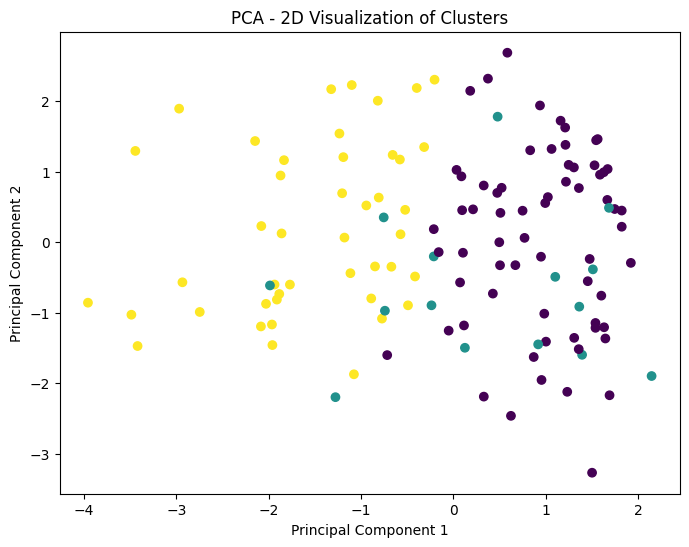

In [24]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Visualization of Clusters')
plt.show()

### Uniform Manifold Approximation and Projection (UMAP):
##### UMAP is another dimensionality reduction technique that can be particularly effective for visualizing clusters in high-dimensional data.

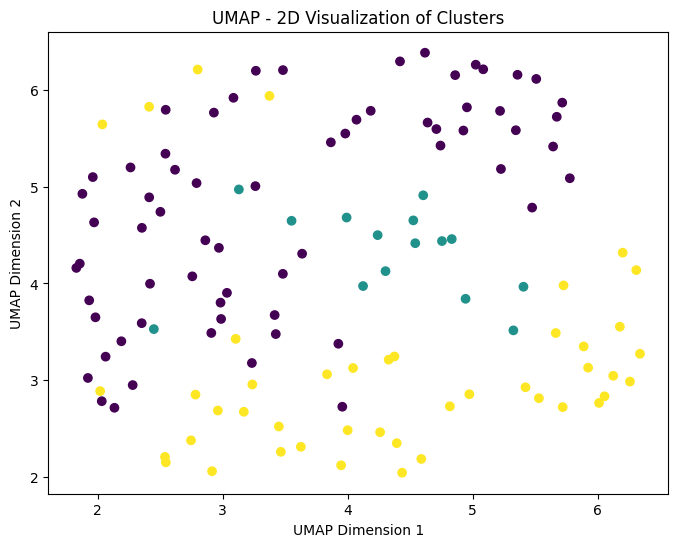

In [25]:
import umap.umap_ as umap

umap_reducer = umap.UMAP(n_components=2, n_jobs=-1)  # n_jobs=-1 uses all available cores
umap_result = umap_reducer.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP - 2D Visualization of Clusters')
plt.show()

---
## Task 4: Fetching Geolocational Data from Foursquare API
In this task, we are using the Foursquare API to fetch geolocational data, including nearby amenities such as restaurants.

#### FoursquareAPI key: fsq3boHgIjG5qvz5vBtpvE8ns4qAo4lrrPFLBf+tlbn+dr8=

In [26]:
api_key = 'fsq3boHgIjG5qvz5vBtpvE8ns4qAo4lrrPFLBf+tlbn+dr8='
url = 'https://api.foursquare.com/v3/places/search'
location = {
    'lat': 12.967408,  # Bengaluru city latitude
    'lng': 77.727948   # Bengaluru city longitude
}
params = {
    'll': f"{location['lat']},{location['lng']}",
    'radius': 2000,  # Radius in meters
    'query': 'college & university',
    'categories': '12000',
    'limit': 10
}
headers = {
    'Accept': 'application/json',
    'Authorization': api_key
}
response = requests.get(url, params=params, headers=headers)

print(f"Status Code: {response.status_code}")
print(f"Response: {response.text}")

if response.status_code == 200:
    results = response.json()

    # Check if the results contain any venues
    if 'results' in results and len(results['results']) > 0:
        # Loop through the results and print the names and addresses
        for place in results['results']:
            name = place.get('name', 'Unknown')
            address = place.get('location', {}).get('formatted_address', 'Address not available')
            print(f"Name: {name}, Address: {address}")
    else:
        print("No results found for this query.")
else:
    print(f"Error: {response.status_code}, {response.text}")

Status Code: 200
Response: {"results":[{"fsq_id":"56b592d1498eb70b8865cb1c","categories":[{"id":12009,"name":"Education","short_name":"Education","plural_name":"Education","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/building/school_","suffix":".png"}}],"chains":[],"closed_bucket":"LikelyOpen","distance":853,"geocodes":{"main":{"latitude":12.974429,"longitude":77.731394},"roof":{"latitude":12.974429,"longitude":77.731394}},"link":"/v3/places/56b592d1498eb70b8865cb1c","location":{"country":"IN","cross_street":"","formatted_address":"941735","postcode":"941735"},"name":"Vydehi School of Excellence","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"4c874e4f9683b7133a261e59","categories":[{"id":12013,"name":"College and University","short_name":"College & Education","plural_name":"Colleges and Universities","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/education/default_","suffix":".png"}}],"chains":[],"closed_bucket":"LikelyOpen","distance":994,"geocodes":{"